In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [22]:
data = pd.read_excel("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject\\data\\first_practice_dataframe.xlsx", sheet_name="Sheet1")
PROFICIENCY_LEVEL = "cat10_proficiencyLevel"
AGE = "cat9_age"
NUM_1 = "num1_24"
NUM_2 = "num2_24"
NUM_3 = "num3_24"
headers = [PROFICIENCY_LEVEL, AGE, NUM_1, NUM_2, NUM_3]
frame = pd.DataFrame(data[headers])
print(frame)

    cat10_proficiencyLevel            cat9_age      num1_24      num2_24  \
0                 Advanced      below 21 years   907.348256   242.734013   
1                   Novice  59 years and above   962.219776  1035.400665   
2                   Novice  59 years and above  1053.680910  -469.064161   
3                 Advanced  59 years and above  1148.702980  2793.294228   
4                 Advanced  59 years and above  1018.119147  -954.043533   
..                     ...                 ...          ...          ...   
995               Advanced      below 21 years   815.379375  -154.418945   
996                 novice  59 years and above  1195.478914  -572.061291   
997                 Novice      21 to 35 years   762.115010  -596.334731   
998                 Novice  59 years and above   730.372126 -1101.408593   
999               Advanced      36 to 58 years  1015.521911   838.290002   

        num3_24  
0    971.167308  
1    933.449443  
2    950.209325  
3    942.957073

ValueError: could not convert string to float: 'Advanced'

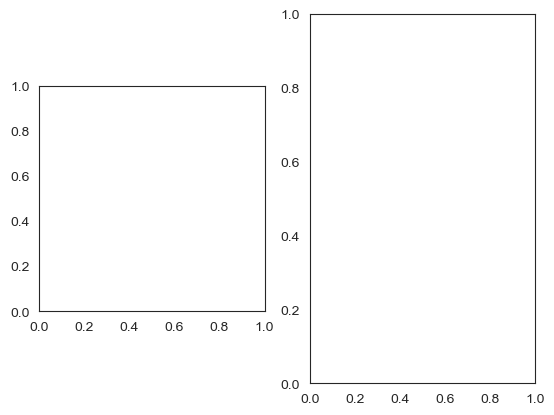

In [23]:
fig, axs = plt.subplots(1, 2)
axs[0].pie(data[PROFICIENCY_LEVEL].values, labels=data[PROFICIENCY_LEVEL].index)
axs[0].set_title("1")
axs[1].bar(x=data[PROFICIENCY_LEVEL].index, height=data[PROFICIENCY_LEVEL].values)
axs[1].set_title("2")
plt.show()

In [ ]:
frame.info()
frame[NUM_3].head(100)

In [ ]:
for i in range(len(frame[NUM_3])):
    if not isinstance(frame.at[i, NUM_3], float):
        frame.at[i, NUM_3] = np.nan
frame[NUM_3].astype(np.float64, errors='raise')
frame.info()
frame

Построение графиков признаков

In [ ]:
num3 = frame[NUM_1]
print(num3.tolist())
n_bins = len(num3)
fig2, axs2 = plt.subplots(1, 2)
axs2[0].hist(num3, bins=n_bins)
axs2[1].boxplot(x=num3)
plt.show()

In [ ]:
sns.set_style("white")
sns.distplot(frame[NUM_1], color="dodgerblue", label="Compact")

Оценка выбросов методом квантилей

In [ ]:
from scipy.stats import sigmaclip
c, low, upp = sigmaclip(num3, 4, 4)
sns.histplot(c, color="dodgerblue", label="Compact")

In [ ]:
def outlier_estimation(value):
    column = num3
    #me = column.median()
    #mo = column.mode().tolist()[0]
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    delta = q75 - q25
    inside_border = [(q25 - 1.5 * delta), (q75 + 1.5 * delta)]
    outside_border = [(q25 - 3 * delta), (q75 + 3 * delta)]
    print(inside_border, outside_border)
    if value > outside_border[1] or value < outside_border[0]:
        return 2
    elif value > inside_border[1] or value < inside_border[0]:
        return 1
    else:
        return 0

In [ ]:
print(outlier_estimation(1000))

In [ ]:
data[NUM_1].plot.kde()